# New York City Taxi Fare Prediction
<img src= "https://miro.medium.com/max/1200/1*-Oa3eUBRoF4uzvJkp9OV_Q.jpeg" alt ="Titanic" style='width:8600px;'>

Image Credit : <a href="https://medium.com/analytics-vidhya/new-york-city-taxi-fare-prediction-1ba96223ba7e">Medium article</a>


Let's train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


## Step 1. Loading the Dataset

- Install required libraries
- Download data from Kaggle or Use Kaggle Notebook for using data without downloading
- View dataset files
- Load training and test set with Pandas

### Load dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [2]:
data_dir = '/kaggle/input/new-york-city-taxi-fare-prediction'

### View Dataset Files

In [3]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 nobody nogroup  486 Oct 20 08:22 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 nobody nogroup 336K Oct 20 08:22 sample_submission.csv
-rw-r--r-- 1 nobody nogroup 960K Oct 20 08:22 test.csv
-rw-r--r-- 1 nobody nogroup 5.4G Oct 20 08:23 train.csv


As we can see training file is too large. so before loading it into dataframe let's take a look at training data using shell commands

In [4]:
# Training dataset
!head {data_dir}/train.csv

In [5]:
# Test dataset
!head {data_dir}/test.csv

In [6]:
# sample_submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [7]:
# count number of lines in training dataset
!wc -l {data_dir}/train.csv

55423856 /kaggle/input/new-york-city-taxi-fare-prediction/train.csv


In [8]:
# count number of lines in test dataset
!wc -l {data_dir}/test.csv

9914 /kaggle/input/new-york-city-taxi-fare-prediction/test.csv


In [9]:
# No. of lines in sample_submission file
!wc -l {data_dir}/sample_submission.csv

9915 /kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size and consist of 55.4 M rows
- Test set is much smaller (only ≈ 10 K rows)
- 8 fetures present:
    - `key` (unique ID field, used in submission)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
    - `fare_amount` (target column)

- The test set has all columns except the target column.

### Loading Training and test Dataset into pandas

Loading the entire dataset into pandas dataframe will be slow, let's take following measures

- Because 'key' column can not be used for prediction. Ignore it.
- Parse pickup_datetime 
- Specify data types for other columns
   - `uint8` for passenger count
   - `float32` for geo coordinates
   - `float32` for fare amount
   
- Only use 1% sample of the data for model training for now (≈500K rows)

In [10]:
import pandas as pd
import random
from datetime import datetime

In [11]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count': 'uint8'
}

In [12]:
%%time

frac = 0.01
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > frac

random.seed(10)
# dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

taxi_df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'],
                 skiprows=skip_row)

CPU times: user 2min 5s, sys: 1.18 s, total: 2min 6s
Wall time: 2min 6s


In [13]:
taxi_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,9.3,2012-05-04 06:11:20+00:00,-73.989258,40.690834,-74.004135,40.725689,1
1,16.5,2014-12-08 16:00:01+00:00,-73.982803,40.745289,-74.014252,40.702934,1
2,9.7,2010-11-08 20:42:00+00:00,-73.970703,40.761642,-73.992836,40.727646,2
3,23.5,2014-06-25 17:43:16+00:00,-73.958588,40.775616,-74.000481,40.737610,1
4,7.5,2014-05-30 21:44:34+00:00,-73.964127,40.792641,-73.979980,40.782036,2
...,...,...,...,...,...,...,...
553926,4.9,2010-02-12 19:52:00+00:00,-73.967461,40.763969,-73.967400,40.759293,1
553927,15.5,2013-05-01 06:51:59+00:00,-73.981079,40.764301,-74.014679,40.714188,1
553928,15.7,2009-02-14 20:55:41+00:00,-73.936462,40.853058,-73.972488,40.791531,1
553929,6.0,2014-08-18 09:02:20+00:00,-73.950432,40.775360,-73.955780,40.764072,2


In [14]:
type(taxi_df.pickup_datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
# Load Test Set
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [16]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


## Step 2. Data Cleaning, Data Visualization and Feature Engineering

- Basic info about training set
- Basic info about test set
- Remove noise and outliers
- Exploratory data analysis & visualization
- Ask & answer questions
- Add features to dataset

### Training Dataset

In [17]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553931 entries, 0 to 553930
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        553931 non-null  float32            
 1   pickup_datetime    553931 non-null  datetime64[ns, UTC]
 2   pickup_longitude   553931 non-null  float32            
 3   pickup_latitude    553931 non-null  float32            
 4   dropoff_longitude  553926 non-null  float32            
 5   dropoff_latitude   553926 non-null  float32            
 6   passenger_count    553931 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [18]:
taxi_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,553931.000000,553931.000000,553931.000000,553926.000000,553926.000000,553931.000000
mean,11.336367,-72.322510,39.852463,-72.319557,39.846710,1.685293
std,9.754655,11.015408,9.555308,11.779662,9.082392,1.393978
min,-145.000000,-1659.514648,-3050.462646,-2771.290039,-3117.510742,0.000000
25%,6.000000,-73.992058,40.735012,-73.991394,40.734138,1.000000
50%,8.500000,-73.981819,40.752693,-73.980148,40.753174,1.000000
75%,12.500000,-73.967087,40.767254,-73.963669,40.768051,2.000000
max,542.830017,469.869843,3348.681885,2134.997070,2878.878906,208.000000


In [19]:
taxi_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
dtype: int64

In [20]:
taxi_df.fare_amount.lt(0).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
553926    False
553927    False
553928    False
553929    False
553930    False
Name: fare_amount, Length: 553931, dtype: bool>

In [21]:
taxi_df.pickup_datetime.min(), taxi_df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:34+0000', tz='UTC'),
 Timestamp('2015-06-30 23:44:42+0000', tz='UTC'))

In [22]:
sum(taxi_df['fare_amount']>100)

187

Observations about training data:

- missing data present
- `fare_amount` is negative in some cols. That is not no realistic. So i will drop these rows from dataset. 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~15 MB of space in the RAM

### Test Set

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751553,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [25]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [26]:
taxi_df = taxi_df.dropna()
test_df = test_df.dropna()

In [27]:
taxi_df = taxi_df[(taxi_df['fare_amount']>=0)]

In [28]:
# import libraries for data visulization
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import seaborn as sns
import warnings


In [29]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

warnings.simplefilter(action='ignore', category=FutureWarning)

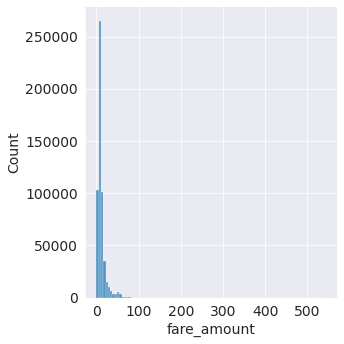

In [30]:
sns.displot(taxi_df['fare_amount'], kde=False, bins=100)

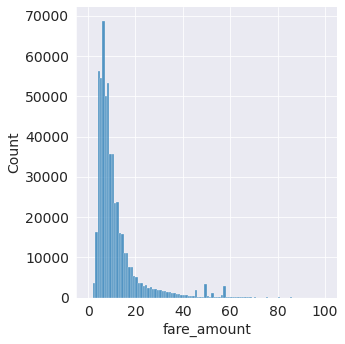

In [31]:
sns.displot(taxi_df[taxi_df['fare_amount']<=100]['fare_amount'], kde=False, bins=100)

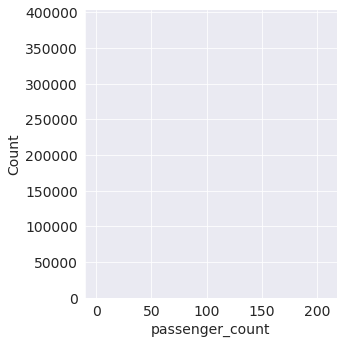

In [32]:
sns.displot(taxi_df['passenger_count'], kde=False)

In [33]:
sum(taxi_df['passenger_count']>10)

3

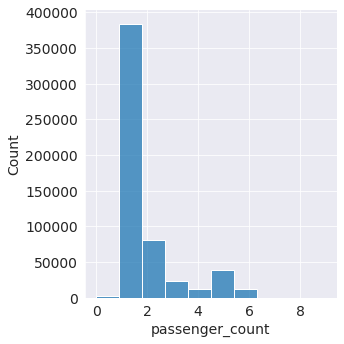

In [34]:
sns.displot(taxi_df[taxi_df['passenger_count']<=10].passenger_count, kde=False, bins=10)

In [35]:
sum(taxi_df['passenger_count']==0)

1929

<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

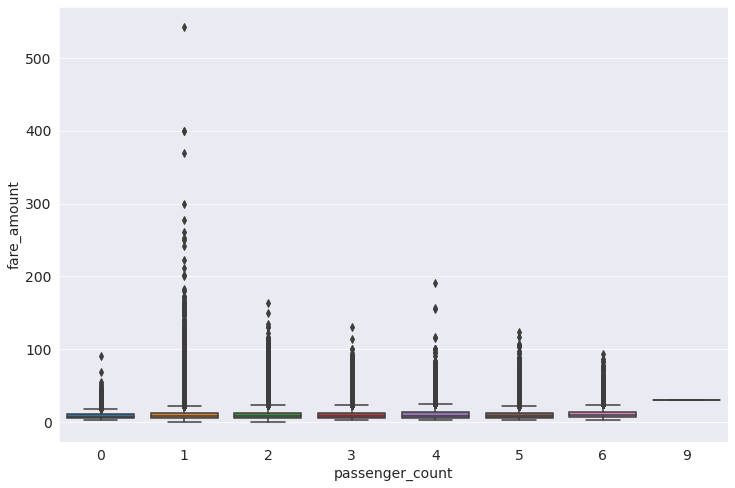

In [36]:
sns.boxplot(data=taxi_df[taxi_df['passenger_count']<=10], x="passenger_count", y="fare_amount")

In [37]:
taxi_df[taxi_df['passenger_count']>8]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
89495,30.83,2014-11-30 22:03:54+00:00,-73.863510,40.769806,-73.950584,40.770939,9
205185,3.30,2010-12-29 12:33:00+00:00,-73.937729,40.758579,-73.937714,40.758606,208
290480,7.10,2009-05-04 23:08:00+00:00,-73.937752,40.758377,-73.937828,40.758266,208
385094,3.30,2010-12-15 13:47:00+00:00,0.000000,0.000000,0.000000,0.000000,208


Although it is unlikely for taxi to have more than 5 passanger. Even if i consider some extereme scenario taxis can't carry more than 8 passangers. So Let's drop these data points

In [38]:
taxi_df = taxi_df.drop(taxi_df[taxi_df['passenger_count']>8].index, axis = 0)

Now because we have longitude and latitude. So We have plot these coordinate on a map to get a better view and see if there is some data to be cleaned.
First let's define the Bounding Box from data of test dataset. Bounding Box is the area defined by two longitudes and two latitudes that will include all spatial points.

In [39]:
bbox = (min(test_df.pickup_longitude.min(), test_df.dropoff_longitude.min()),
        max(test_df.pickup_longitude.max(), test_df.dropoff_longitude.max()),
        min(test_df.pickup_latitude.min(), test_df.dropoff_latitude.min()),
        max(test_df.pickup_latitude.max(), test_df.dropoff_latitude.max())
)
       
bbox

(-74.26324462890625,
 -72.98653411865234,
 40.568973541259766,
 41.709556579589844)

We can go to https://www.openstreetmap.org/export#map=5/51.500/-0.100 to get the desired map.
I have followed this medium article for getting the map and plotting pickup and dropoff location on that map. https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

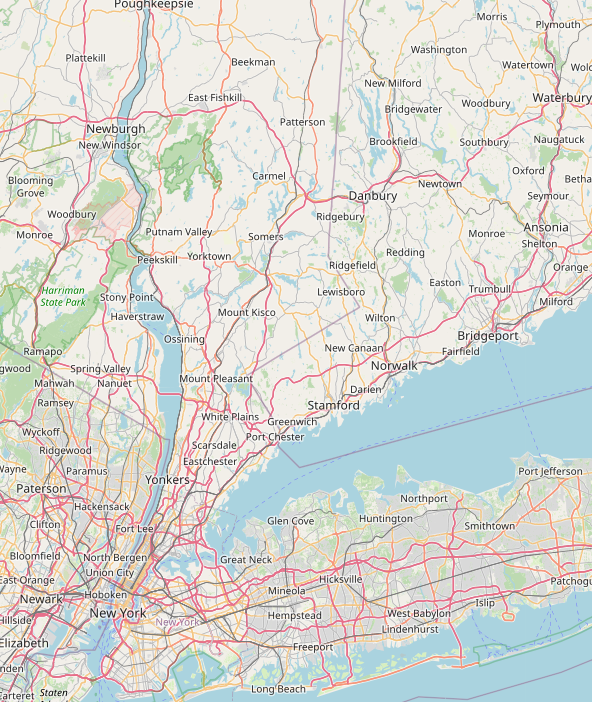

In [40]:
import PIL
import urllib
import io

url = 'https://i.imgur.com/xx2b9dC.png'
nyc_map = PIL.Image.open(urllib.request.urlopen(url))
nyc_map

In [41]:
nyc_map = np.array(nyc_map)

Because I do not have to predict fare for trips that are outside that bounding box and we already have enough large dataset. So let's drop data points outside of bounding box

In [42]:
taxi_df = taxi_df[(taxi_df.pickup_longitude >= bbox[0]) & (taxi_df.pickup_longitude <= bbox[1]) &
            (taxi_df.pickup_latitude >= bbox[2]) & (taxi_df.pickup_latitude <= bbox[3]) & 
            (taxi_df.dropoff_longitude >= bbox[0]) & (taxi_df.dropoff_longitude <= bbox[1]) & 
            (taxi_df.dropoff_latitude >= bbox[2]) & (taxi_df.dropoff_latitude <= bbox[3])]

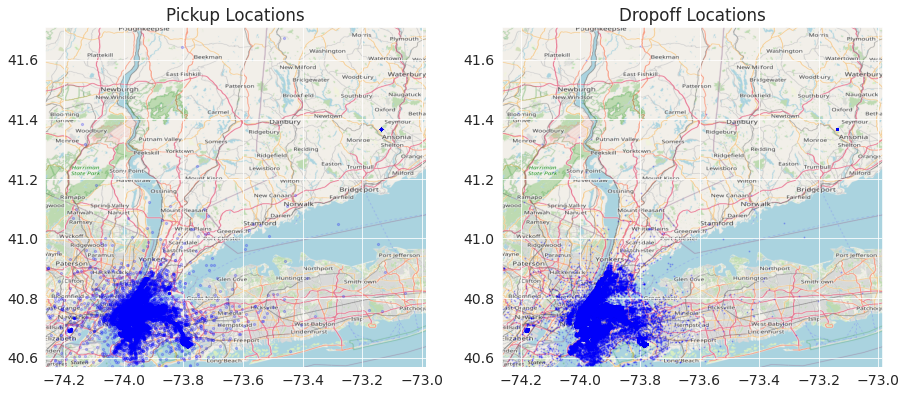

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15,9))
ax[0].scatter(taxi_df['pickup_longitude'], taxi_df['pickup_latitude'], zorder=1, alpha= 0.2, c='b', s=5)
ax[0].set_title('Pickup Locations')
ax[0].set_xlim(bbox[0],bbox[1])
ax[0].set_ylim(bbox[2],bbox[3])
ax[0].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

ax[1].scatter(taxi_df['dropoff_longitude'], taxi_df['dropoff_latitude'], zorder=1, alpha= 0.2, c='b', s=1)
ax[1].set_title('Dropoff Locations')
ax[1].set_xlim(bbox[0],bbox[1])
ax[1].set_ylim(bbox[2],bbox[3])
ax[1].imshow(nyc_map, zorder=0, extent = bbox, aspect= 'equal')

plt.imshow(nyc_map)

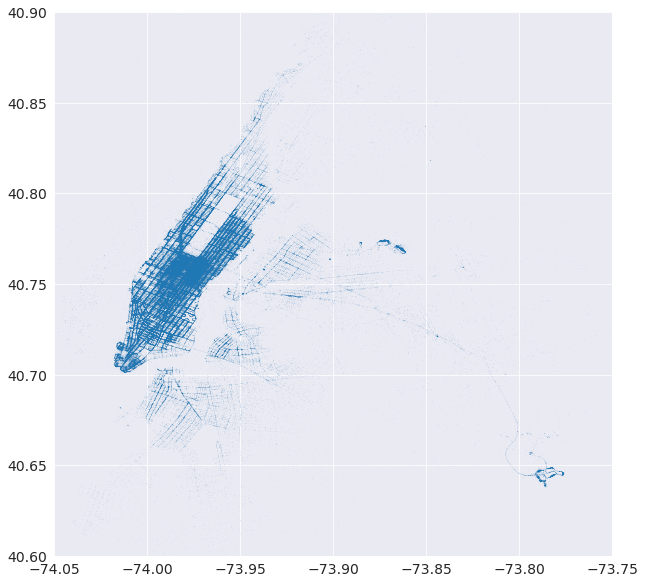

In [44]:
longitude = list(taxi_df.pickup_longitude) + list(taxi_df.dropoff_longitude)
latitude = list(taxi_df.pickup_latitude) + list(taxi_df.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


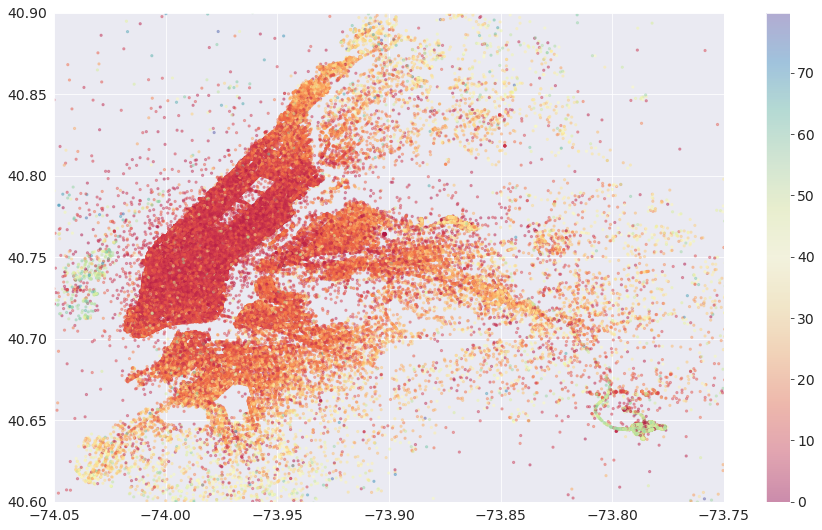

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (15,9))
xdf = taxi_df[taxi_df['fare_amount']<80]

sp = ax.scatter(xdf.dropoff_longitude, xdf.dropoff_latitude, c=xdf.fare_amount,alpha= 0.4, s=5, cmap='Spectral')
fig.colorbar(sp)
ax.set_xlim(-74.05, -73.75)
ax.set_ylim(40.6, 40.9)
plt.show()

Places that are far away has higher taxi fare. Makes sense

It can be seen from previous plots that some location points are in the water. Let's try to remove them using a mask image of map in which land is shown in black and water in white. I've taken help from this notebook for that. https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [46]:
url = 'https://i.imgur.com/ZGg3Bry.png'
nyc_mask = np.array(PIL.Image.open(urllib.request.urlopen(url)))[:,:,0]>(255*0.7)

In [47]:
nyc_mask.shape

(702, 592)

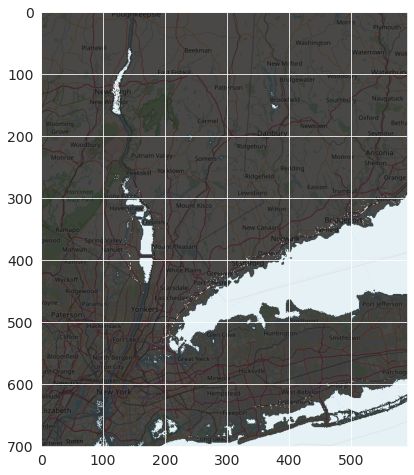

In [48]:
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, alpha=0.7, cmap='gray')

In [49]:
def location_to_coor(longitude, latitude, dx, dy, bbox):
    return (dx*(longitude - bbox[0])/(bbox[1]-bbox[0])).astype('int'), (dy - dy*(latitude - bbox[2])/(bbox[3]-bbox[2])).astype('int')

In [50]:
pickup_x, pickup_y = location_to_coor(taxi_df.pickup_longitude, taxi_df.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], bbox)
dropoff_x, dropoff_y = location_to_coor(taxi_df.dropoff_longitude, taxi_df.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], bbox)

In [51]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("Number of trips in water: {}".format(np.sum(idx)))

Number of trips in water: 19


In [52]:
np.count_nonzero(idx==0)

542254

In [53]:
taxi_df[idx]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
88480,8.500000,2011-09-03 00:00:00+00:00,-73.776817,40.575539,-73.812759,40.576694,1
91967,6.100000,2011-12-31 17:01:00+00:00,-73.796921,40.835251,-73.804588,40.834156,5
163928,4.500000,2011-04-13 16:19:00+00:00,-73.810997,40.841358,-73.810738,40.837276,5
188681,13.000000,2013-06-22 18:24:41+00:00,-73.804680,40.626163,-73.804680,40.626163,1
206198,6.500000,2010-12-22 07:38:00+00:00,-73.714737,40.893059,-73.708366,40.897453,1
212032,6.100000,2011-02-20 21:58:00+00:00,-73.813934,40.630386,-73.844170,40.624168,3
218771,10.100000,2009-08-17 10:24:26+00:00,-73.815353,40.851566,-73.815353,40.851566,1
232974,7.300000,2010-11-11 21:01:00+00:00,-73.723808,40.909267,-73.697670,40.907833,1
233382,3.300000,2010-05-19 09:10:00+00:00,-73.281006,41.049183,-73.318054,41.052608,1
285759,12.100000,2009-05-25 21:20:00+00:00,-73.592239,40.963032,-73.250740,41.004768,5


These all coordinates lies on water. I've checked two of then using <a href="https://www.google.com/maps/place/41%C2%B002'57.1%22N+73%C2%B016'51.6%22W/@40.9199231,-73.5469829,8.24z/data=!4m5!3m4!1s0x0:0x4004ca2e07ed014b!8m2!3d41.049183!4d-73.281006">Google Maps</a>.
Let's drop these data points

In [54]:
taxi_df = taxi_df[~idx]

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour

In [55]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [56]:
add_dateparts(taxi_df, 'pickup_datetime')

In [57]:
add_dateparts(test_df, 'pickup_datetime')

In [58]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


### Add Distance Between Pickup and Drop

I have calculated the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [59]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [60]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [61]:
%%time
add_trip_distance(taxi_df)
add_trip_distance(test_df)

CPU times: user 18.1 ms, sys: 6.01 ms, total: 24.1 ms
Wall time: 23.9 ms


In [62]:
taxi_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
count,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000,542254.000000
mean,11.315565,-73.759697,40.668331,-73.758553,40.668873,1.684362,2011.740701,6.273383,15.700851,3.044236,13.507613,3.322095
std,9.637389,0.218759,0.087863,0.218920,0.088864,1.308528,1.862184,3.437167,8.684667,1.948899,6.511144,3.739616
min,0.000000,-74.258034,40.569279,-74.258026,40.569016,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992264,40.736622,-73.991570,40.735722,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.255926
50%,8.500000,-73.982101,40.753407,-73.980598,40.753876,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.153191
75%,12.500000,-73.968300,40.767666,-73.965340,40.768360,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.908696
max,542.830017,-73.055931,41.672424,-73.055931,41.644775,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,115.060356


In [63]:
taxi_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,9.3,2012-05-04 06:11:20+00:00,-73.989258,40.690834,-74.004135,40.725689,1,2012,5,4,4,6,4.070878
1,16.5,2014-12-08 16:00:01+00:00,-73.982803,40.745289,-74.014252,40.702934,1,2014,12,8,0,16,5.400517
2,9.7,2010-11-08 20:42:00+00:00,-73.970703,40.761642,-73.992836,40.727646,2,2010,11,8,0,20,4.212385
3,23.5,2014-06-25 17:43:16+00:00,-73.958588,40.775616,-74.000481,40.737610,1,2014,6,25,2,17,5.502296
4,7.5,2014-05-30 21:44:34+00:00,-73.964127,40.792641,-73.979980,40.782036,2,2014,5,30,4,21,1.779772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553926,4.9,2010-02-12 19:52:00+00:00,-73.967461,40.763969,-73.967400,40.759293,1,2010,2,12,4,19,0.519565
553927,15.5,2013-05-01 06:51:59+00:00,-73.981079,40.764301,-74.014679,40.714188,1,2013,5,1,2,6,6.246140
553928,15.7,2009-02-14 20:55:41+00:00,-73.936462,40.853058,-73.972488,40.791531,1,2009,2,14,5,20,7.478480
553929,6.0,2014-08-18 09:02:20+00:00,-73.950432,40.775360,-73.955780,40.764072,2,2014,8,18,0,9,1.332569


<AxesSubplot:xlabel='pickup_datetime_day', ylabel='fare_amount'>

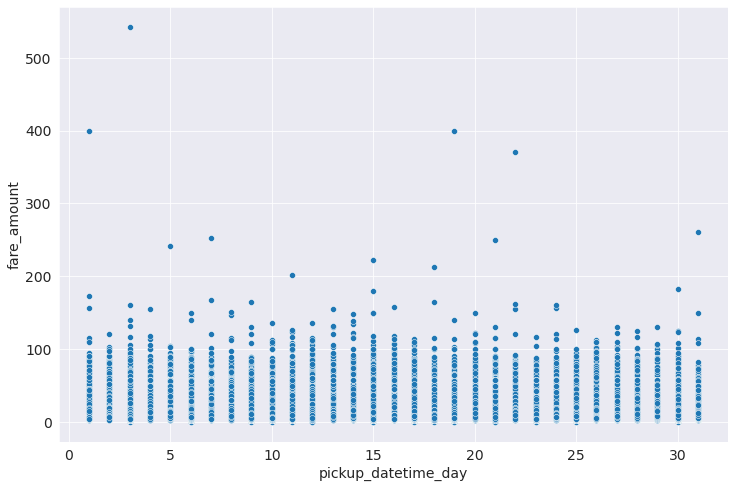

In [64]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_day", y="fare_amount")

Throught days of a month fare seems to be uniformly distributed

<AxesSubplot:xlabel='pickup_datetime_year', ylabel='fare_amount'>

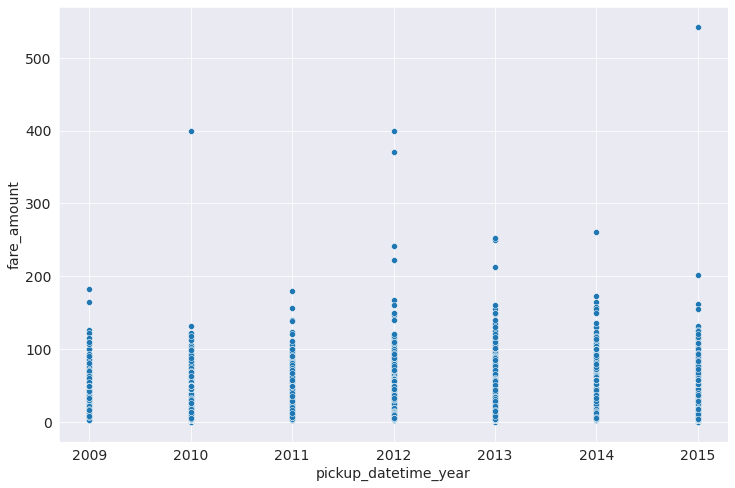

In [65]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_year", y="fare_amount")

In [66]:
taxi_df.groupby('pickup_datetime_year').mean()['fare_amount']

pickup_datetime_year
2009    10.039182
2010    10.116649
2011    10.400131
2012    11.161597
2013    12.589558
2014    12.883366
2015    12.950344
Name: fare_amount, dtype: float32

Fare amount seems to steadily increasing by year as expected

<AxesSubplot:xlabel='pickup_datetime_weekday', ylabel='fare_amount'>

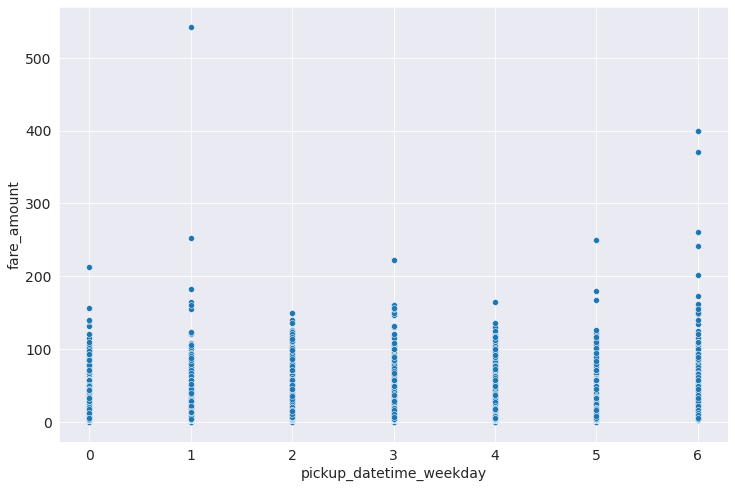

In [67]:
sns.scatterplot(data = taxi_df, x="pickup_datetime_weekday", y="fare_amount")

<AxesSubplot:>

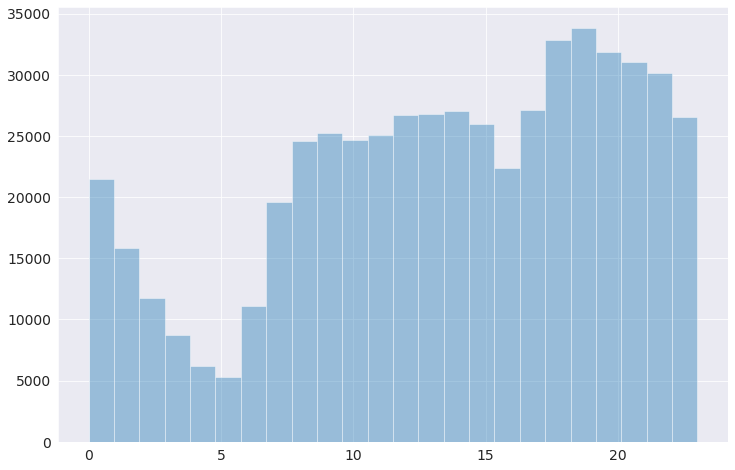

In [68]:
sns.distplot(x=taxi_df['pickup_datetime_hour'], bins=24, kde=False)

No. of trips are lowest from midnight to 5 am and highest in evening when there are people returning from their workplaces. Nothing unexpected. Time of the day also plays an important role.

<AxesSubplot:xlabel='pickup_datetime_hour', ylabel='fare_amount'>

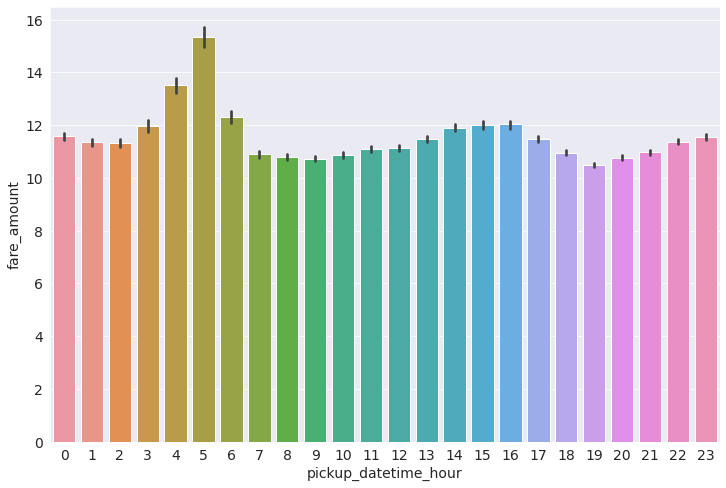

In [69]:
sns.barplot(x='pickup_datetime_hour',y='fare_amount', data=taxi_df)

<AxesSubplot:xlabel='pickup_datetime_hour', ylabel='trip_distance'>

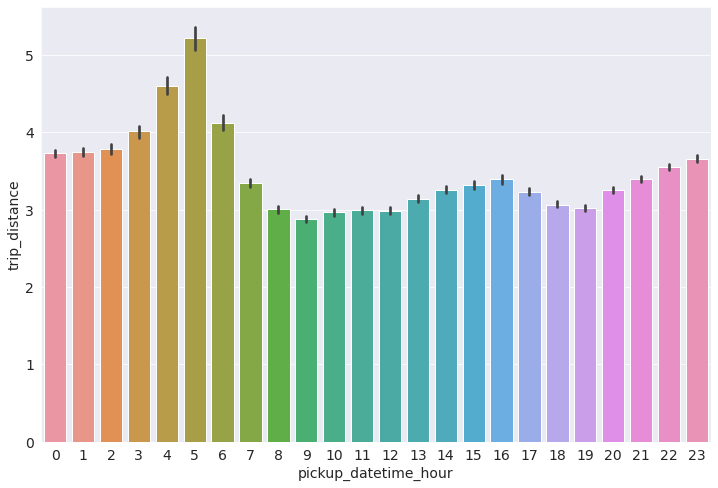

In [70]:
sns.barplot(x='pickup_datetime_hour',y='trip_distance', data=taxi_df)

Fare is higher b/w 3-6 am and 2-4 pm . It maybe possible that people living far away from their workplaces prefer to leave early to avoid rush hour

<AxesSubplot:>

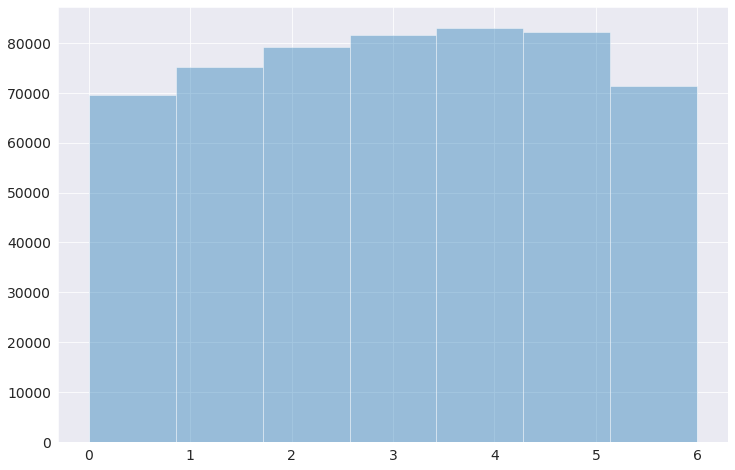

In [71]:
sns.distplot(x=taxi_df['pickup_datetime_weekday'], bins=7, kde=False)

trips are uniformly devided throught all days of week.

<AxesSubplot:xlabel='pickup_datetime_weekday', ylabel='fare_amount'>

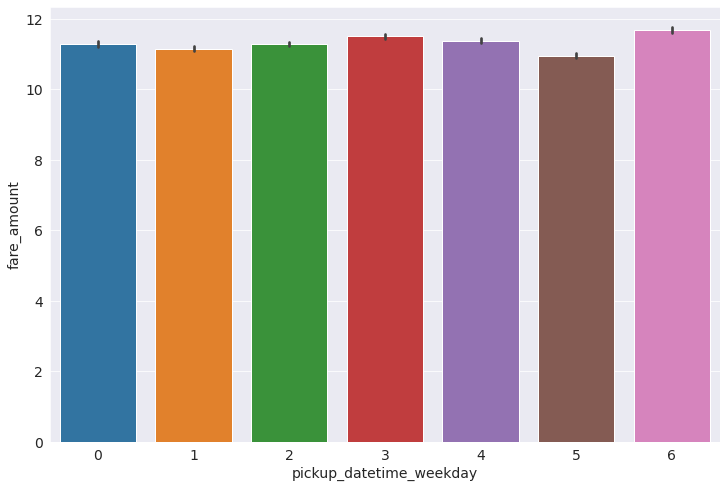

In [72]:
sns.barplot(x='pickup_datetime_weekday',y='fare_amount', data=taxi_df)

There seems to slight increase avg fare amount on sunday. Maybe people are going for weekend travel. Or maybe I am overthinking it??

<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

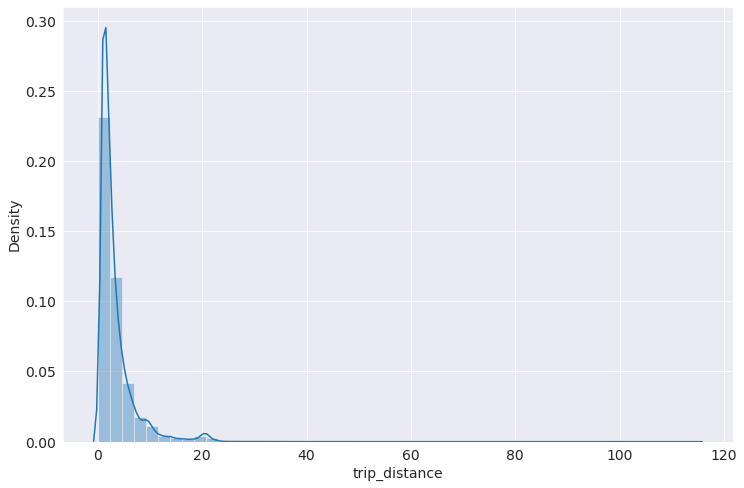

In [73]:
sns.distplot(taxi_df['trip_distance'])

In [74]:
taxi_df[taxi_df['trip_distance']>100]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
16383,14.900000,2009-02-07 02:14:12+00:00,-73.985214,40.724209,-73.137390,41.366138,1,2009,2,7,5,2,100.684540
39867,12.900000,2009-09-11 19:43:24+00:00,-74.008476,40.720333,-73.137390,41.366138,1,2009,9,11,4,19,102.372406
83980,12.100000,2009-06-14 18:36:56+00:00,-73.137390,41.366138,-73.996864,40.716496,2,2009,6,14,6,18,101.983421
205320,35.700001,2009-06-30 17:03:09+00:00,-73.137390,41.366138,-73.973984,40.688816,1,2009,6,30,1,17,102.876762
206941,7.700000,2009-12-16 19:25:20+00:00,-73.137390,41.366138,-73.989807,40.729534,1,2009,12,16,2,19,100.536888
223685,6.500000,2009-11-20 22:41:22+00:00,-73.137390,41.366138,-73.989639,40.730289,1,2009,11,20,4,22,100.467430
286885,9.700000,2009-10-10 11:38:54+00:00,-73.997437,40.732296,-73.137390,41.366138,1,2009,10,10,5,11,100.776573
357687,8.900000,2009-08-10 21:09:41+00:00,-73.137390,41.366138,-73.980782,40.720959,3,2009,8,10,0,21,100.680618
378714,7.300000,2009-06-27 20:10:32+00:00,-73.137390,41.366138,-73.997528,40.724152,1,2009,6,27,5,20,101.419403
414791,15.700000,2009-06-27 07:49:40+00:00,-73.137390,41.366138,-74.013802,40.703594,4,2009,6,27,5,7,104.006172


In [75]:
taxi_df.loc[(taxi_df['trip_distance']>200)&(taxi_df['fare_amount']!=0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance


For some trips distance travelled is even higher then 100 km. I think that it is quite unlikely but not impossible. So I'm not going to drop these rows. 

In [76]:
taxi_df[taxi_df['trip_distance']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
5,2.5,2010-01-19 01:10:00+00:00,-73.998718,40.624706,-73.998718,40.624706,1,2010,1,19,1,1,0.0
82,2.5,2010-12-06 11:48:34+00:00,-73.946991,40.744583,-73.946991,40.744583,3,2010,12,6,0,11,0.0
93,7.3,2012-01-03 22:42:56+00:00,-74.002357,40.741440,-74.002357,40.741440,1,2012,1,3,1,22,0.0
190,7.7,2011-10-07 07:41:00+00:00,-73.821640,40.754520,-73.821640,40.754520,1,2011,10,7,4,7,0.0
331,5.3,2010-04-23 19:34:41+00:00,-74.012161,40.736717,-74.012161,40.736717,1,2010,4,23,4,19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553387,5.0,2014-11-11 15:02:23+00:00,-73.982254,40.757866,-73.982254,40.757866,1,2014,11,11,1,15,0.0
553477,6.5,2013-06-06 12:04:49+00:00,-73.884773,40.807976,-73.884773,40.807976,1,2013,6,6,3,12,0.0
553534,9.7,2012-06-03 20:23:00+00:00,-73.999557,40.757404,-73.999557,40.757404,1,2012,6,3,6,20,0.0
553620,45.0,2010-05-30 14:31:35+00:00,-74.056389,40.764812,-74.056389,40.764812,1,2010,5,30,6,14,0.0


There are some rows where trip distance travelled is 0. This could happen because of
- Passanger cancelled the cab when it arrived (fare_amount should be 0 for this case)
- pickup or dropoff coordinates were not entered correctly.

In [77]:
later = taxi_df[(taxi_df['trip_distance']==0) & (taxi_df['fare_amount']==0)]
later

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
21998,0.0,2010-02-03 11:44:07+00:00,-74.014145,40.710545,-74.014145,40.710545,1,2010,2,3,2,11,0.0
163973,0.0,2015-05-30 21:32:58+00:00,-73.658379,40.698029,-73.658379,40.698029,2,2015,5,30,5,21,0.0


This is not an unexpected behaviour. That's why I'm not going to drop these rows. 

**New York Taxi Fare**

- `By Day`
    - Base fee:  \\$ 2.50
    - Kilometer price: \\$ 1.56


- `By night Monday to Friday from 8:00pm until 6:00am. Saturday and Sunday all day.`
    - Base fee: \\$ 3.00
    - Kilometer price: \\$ 1.56

Source :- https://www.taxi-calculator.com/taxi-rate-new-york-city/259

But therse are some rows where distance is not zero but fare amount is less then the base price. Let's first remove those.
Now For the rest of the rows let's try to impute these values using the base fare.

In [78]:
len(taxi_df[taxi_df['fare_amount']<2.5])

20

In [79]:
taxi_df[taxi_df['fare_amount']<2.5]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
21998,0.00,2010-02-03 11:44:07+00:00,-74.014145,40.710545,-74.014145,40.710545,1,2010,2,3,2,11,0.000000
23705,0.10,2010-02-15 07:40:00+00:00,-73.793564,40.657207,-73.793564,40.657207,1,2010,2,15,0,7,0.000000
23950,0.00,2015-06-23 14:44:49+00:00,-73.993057,40.722748,-73.993309,40.722206,1,2015,6,23,1,14,0.063985
60087,0.00,2015-03-21 07:06:39+00:00,-74.000061,40.718006,-73.983856,40.694805,2,2015,3,21,5,7,2.917273
66672,0.00,2010-02-15 17:05:48+00:00,-73.789108,40.665260,-73.977654,40.754494,1,2010,2,15,0,17,18.723679
84184,0.01,2010-02-06 00:07:38+00:00,-73.964554,40.766731,-73.960159,40.775463,1,2010,2,6,5,0,1.038599
107848,0.00,2015-01-09 08:07:56+00:00,-73.966858,40.788818,-73.966866,40.788822,1,2015,1,9,4,8,0.000689
121139,0.01,2015-05-18 08:39:00+00:00,-73.975227,40.755825,-73.975227,40.755810,1,2015,5,18,0,8,0.001518
163973,0.00,2015-05-30 21:32:58+00:00,-73.658379,40.698029,-73.658379,40.698029,2,2015,5,30,5,21,0.000000
164130,0.01,2015-05-11 08:17:39+00:00,-73.961487,40.775898,-73.961472,40.775932,1,2015,5,11,0,8,0.004168


In [80]:
low_fare = taxi_df[(((taxi_df['pickup_datetime_hour']>=6)&(taxi_df['pickup_datetime_hour']<=20)) & ((taxi_df['pickup_datetime_weekday']>=1) & (taxi_df['pickup_datetime_weekday']<=5)) & (taxi_df['fare_amount'] < 2.5))]
taxi_df.drop(low_fare.index, axis=0, inplace=True)

In [81]:
low_fare = taxi_df[(((taxi_df['pickup_datetime_hour']<6)|(taxi_df['pickup_datetime_hour']>20)) & ((taxi_df['pickup_datetime_weekday']>=1)&(taxi_df['pickup_datetime_weekday']<=5)) & (taxi_df['fare_amount'] < 3.0))]
taxi_df.drop(low_fare.index, axis=0, inplace=True)

In [82]:
low_fare = taxi_df[((taxi_df['pickup_datetime_weekday']==0) | (taxi_df['pickup_datetime_weekday']==6)) & (taxi_df['fare_amount'] < 3)]
taxi_df.drop(low_fare.index, axis=0, inplace=True)

Let's also look at the rows where distance is 0 but fare is not.

In [83]:
fnzdz = taxi_df.loc[(taxi_df['trip_distance']==0) & (taxi_df['fare_amount']!=0)]
fnzdz

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
93,7.3,2012-01-03 22:42:56+00:00,-74.002357,40.741440,-74.002357,40.741440,1,2012,1,3,1,22,0.0
190,7.7,2011-10-07 07:41:00+00:00,-73.821640,40.754520,-73.821640,40.754520,1,2011,10,7,4,7,0.0
331,5.3,2010-04-23 19:34:41+00:00,-74.012161,40.736717,-74.012161,40.736717,1,2010,4,23,4,19,0.0
338,4.5,2011-03-29 19:35:00+00:00,-73.990257,40.719437,-73.990257,40.719437,1,2011,3,29,1,19,0.0
468,6.5,2010-09-17 19:36:00+00:00,-73.992950,40.736301,-73.992950,40.736301,1,2010,9,17,4,19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553387,5.0,2014-11-11 15:02:23+00:00,-73.982254,40.757866,-73.982254,40.757866,1,2014,11,11,1,15,0.0
553477,6.5,2013-06-06 12:04:49+00:00,-73.884773,40.807976,-73.884773,40.807976,1,2013,6,6,3,12,0.0
553534,9.7,2012-06-03 20:23:00+00:00,-73.999557,40.757404,-73.999557,40.757404,1,2012,6,3,6,20,0.0
553620,45.0,2010-05-30 14:31:35+00:00,-74.056389,40.764812,-74.056389,40.764812,1,2010,5,30,6,14,0.0


There are quite a lot of rows and we can't just drop them.
I will use taxi fare rates I have previously mentioned.

In [84]:
fnzdz_regular = fnzdz[(((fnzdz['pickup_datetime_hour']>=6)&(fnzdz['pickup_datetime_hour']<=20)) & ((fnzdz['pickup_datetime_weekday']>=1) & (fnzdz['pickup_datetime_weekday']<=5)))]
fnzdz_high = fnzdz.drop(fnzdz_regular.index, axis=0)

In [85]:
fnzdz_regular

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
190,7.700000,2011-10-07 07:41:00+00:00,-73.821640,40.754520,-73.821640,40.754520,1,2011,10,7,4,7,0.0
331,5.300000,2010-04-23 19:34:41+00:00,-74.012161,40.736717,-74.012161,40.736717,1,2010,4,23,4,19,0.0
338,4.500000,2011-03-29 19:35:00+00:00,-73.990257,40.719437,-73.990257,40.719437,1,2011,3,29,1,19,0.0
468,6.500000,2010-09-17 19:36:00+00:00,-73.992950,40.736301,-73.992950,40.736301,1,2010,9,17,4,19,0.0
553,6.100000,2011-04-28 14:24:00+00:00,-73.983139,40.722462,-73.983139,40.722462,1,2011,4,28,3,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553140,57.330002,2015-02-11 09:57:53+00:00,-73.794365,40.657047,-73.794365,40.657047,1,2015,2,11,2,9,0.0
553286,5.000000,2014-03-29 20:06:36+00:00,-74.004524,40.725578,-74.004524,40.725578,1,2014,3,29,5,20,0.0
553387,5.000000,2014-11-11 15:02:23+00:00,-73.982254,40.757866,-73.982254,40.757866,1,2014,11,11,1,15,0.0
553477,6.500000,2013-06-06 12:04:49+00:00,-73.884773,40.807976,-73.884773,40.807976,1,2013,6,6,3,12,0.0


In [86]:
fnzdz_high

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
93,7.3,2012-01-03 22:42:56+00:00,-74.002357,40.741440,-74.002357,40.741440,1,2012,1,3,1,22,0.0
927,4.9,2012-04-21 00:04:00+00:00,-73.989449,40.740063,-73.989449,40.740063,1,2012,4,21,5,0,0.0
929,51.0,2010-03-29 14:36:00+00:00,-73.973610,40.751904,-73.973610,40.751904,1,2010,3,29,0,14,0.0
1239,10.2,2009-03-08 20:44:34+00:00,-73.959526,40.779953,-73.959526,40.779953,2,2009,3,8,6,20,0.0
1378,10.9,2009-06-07 15:28:43+00:00,-73.895462,40.768539,-73.895462,40.768539,1,2009,6,7,6,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552580,7.3,2010-08-29 14:04:00+00:00,-73.967499,40.758724,-73.967499,40.758724,1,2010,8,29,6,14,0.0
553091,6.5,2009-01-26 16:00:00+00:00,-73.972511,40.761272,-73.972511,40.761272,1,2009,1,26,0,16,0.0
553342,6.2,2011-10-23 15:14:00+00:00,-73.985825,40.743546,-73.985825,40.743546,1,2011,10,23,6,15,0.0
553534,9.7,2012-06-03 20:23:00+00:00,-73.999557,40.757404,-73.999557,40.757404,1,2012,6,3,6,20,0.0


In [87]:
fnzdz_regular['trip_distance'] = fnzdz_regular['fare_amount'].apply(lambda fare: ((fare-2.50)/1.56))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
fnzdz_high['trip_distance'] = fnzdz_high['fare_amount'].apply(lambda fare: ((fare-3.0)/1.56))

In [89]:
taxi_df.update(fnzdz_regular)
taxi_df.update(fnzdz_high)

I am going to include the points where fare amount and trip distance were both 0. they were removed earlier with point for which fare amount<2.5.

In [90]:
taxi_df = pd.concat((taxi_df, later))

### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [91]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [92]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [93]:
%%time
for a_df in [taxi_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 67.7 ms, sys: 16 µs, total: 67.7 ms
Wall time: 67.4 ms


In [94]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899,20.574911,9.760167,17.346842,4.239343,4.218709
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777,21.550976,11.315990,15.789623,5.382879,3.098136
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015,20.594069,9.526829,17.576965,3.946721,4.514503
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681,21.689365,10.195091,16.969650,3.843892,4.637048
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829,21.113993,10.295857,16.808367,4.433764,3.967223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265,21.507181,6.880905,21.015013,0.645683,8.809922
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084,21.462183,7.254931,20.464457,0.420341,8.229158
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534,1.169105,16.084494,32.772369,20.734238,19.933737
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154,22.402418,6.138518,23.410772,3.200790,11.556184


## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

Time range for test set is also 2009-2015. So I'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, pick a random 20% fraction.


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
train_df, val_df = train_test_split(taxi_df, test_size=0.2, random_state=10)

In [97]:
len(train_df), len(val_df)

(432491, 108123)

### Extract Inputs and Outputs

In [98]:
taxi_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [99]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [100]:
target_col = 'fare_amount'

#### Training

In [101]:
train_inputs = train_df[input_cols]

In [102]:
train_targets = train_df[target_col]

In [103]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
534475,-73.958710,40.778221,-73.968491,40.768059,1.0,2013.0,4.0,22.0,0.0,18.0,1.397516,21.346251,8.012276,19.421124,1.336545,7.080717
337063,-73.988266,40.740063,-73.978065,40.751789,1.0,2010.0,3.0,9.0,1.0,22.0,1.560267,20.846931,9.192523,17.933781,3.313471,5.113783
53104,-73.987480,40.750553,-73.977272,40.755116,1.0,2014.0,8.0,24.0,6.0,20.0,0.997476,21.013071,9.022677,18.140362,2.947028,5.465214
370708,-74.006805,40.739780,-73.991821,40.755688,1.0,2015.0,5.0,3.0,6.0,20.0,2.171737,22.040894,10.192539,17.052908,3.569870,5.024377
329432,-73.963043,40.777943,-73.988617,40.732323,2.0,2013.0,10.0,17.0,3.0,14.0,5.508075,20.420465,10.845695,16.364840,5.651985,2.831261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307159,-74.003769,40.722542,-73.985542,40.755508,1.0,2009.0,3.0,16.0,0.0,21.0,3.971683,21.599220,9.684270,17.522923,3.253403,5.190455
546788,-73.970917,40.764496,-73.960472,40.774773,1.0,2015.0,6.0,3.0,2.0,12.0,1.440997,21.354204,7.280460,20.362122,0.563280,8.065447
108234,-73.980568,40.760174,-73.980423,40.775276,1.0,2011.0,5.0,19.0,3.0,14.0,1.678205,22.630316,8.957311,18.919476,1.519648,7.394004
454614,-73.988754,40.751060,-73.974434,40.757519,3.0,2011.0,6.0,11.0,5.0,18.0,1.403101,20.985523,8.722612,18.467182,2.608668,5.816872


In [104]:
train_targets

534475     6.5
337063     5.3
53104      7.0
370708     8.5
329432    21.0
          ... 
307159    10.5
546788     7.5
108234     8.1
454614     7.3
353876     5.7
Name: fare_amount, Length: 432491, dtype: float32

#### Validation

In [105]:
val_inputs = val_df[input_cols]

In [106]:
val_targets = val_df[target_col]

In [107]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
355334,-73.964127,40.797577,-73.972839,40.789337,1.0,2014.0,12.0,24.0,2.0,22.0,1.173109,23.230959,8.430690,20.282679,1.370093,9.080235
329047,-73.961411,40.760632,-73.948608,40.774052,1.0,2013.0,10.0,26.0,5.0,21.0,1.839503,20.589497,6.286247,21.215982,1.364495,8.559395
298095,-73.946098,40.773178,-73.987473,40.729057,1.0,2009.0,7.0,12.0,6.0,21.0,6.013864,20.158911,10.931835,16.356499,5.955569,2.629325
146210,-73.980453,40.748558,-73.975975,40.755722,1.0,2014.0,1.0,29.0,2.0,7.0,0.880775,20.966702,8.899368,18.267530,2.842215,5.578866
202532,-73.959557,40.766666,-73.995026,40.742157,2.0,2012.0,8.0,23.0,3.0,16.0,4.041440,21.440523,10.893928,16.209940,4.929626,3.515395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386546,-74.004189,40.713001,-73.995972,40.736073,1.0,2014.0,3.0,11.0,1.0,18.0,2.655444,21.164463,11.224486,15.903827,5.548697,2.860126
239840,-74.011093,40.711060,-73.957237,40.768467,1.0,2015.0,6.0,4.0,3.0,23.0,7.826835,20.674328,7.066903,20.291943,1.314565,7.629346
113209,-73.949776,40.780918,-73.959297,40.767429,1.0,2012.0,11.0,26.0,0.0,8.0,1.699740,20.723387,7.254888,20.085579,1.370188,7.434913
217334,-73.993477,40.733391,-74.012878,40.715366,1.0,2011.0,4.0,8.0,4.0,9.0,2.585084,21.429815,13.544783,13.915944,8.253660,0.396750


In [108]:
val_targets

355334     5.0
329047     6.5
298095    11.3
146210     4.5
202532    15.7
          ... 
386546     9.5
239840    21.0
113209     6.5
217334     9.7
232639    12.0
Name: fare_amount, Length: 108123, dtype: float32

#### Test

In [109]:
test_inputs = test_df[input_cols]

In [110]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899,20.574911,9.760167,17.346842,4.239343,4.218709
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777,21.550976,11.315990,15.789623,5.382879,3.098136
2,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015,20.594069,9.526829,17.576965,3.946721,4.514503
3,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681,21.689365,10.195091,16.969650,3.843892,4.637048
4,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829,21.113993,10.295857,16.808367,4.433764,3.967223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265,21.507181,6.880905,21.015013,0.645683,8.809922
9910,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084,21.462183,7.254931,20.464457,0.420341,8.229158
9911,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534,1.169105,16.084494,32.772369,20.734238,19.933737
9912,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154,22.402418,6.138518,23.410772,3.200790,11.556184


### Scaling and One-Hot Encoding

I am not going to do this because I'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that I will be able to load them back easily to resume our work from this point.

They can also be used to create seperate notebook for training and evaluating models after EDA, feature engineering.


In [111]:
train_df.to_parquet('train.parquet')

In [112]:
val_df.to_parquet('val.parquet')

In [113]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

I will train each of the following & submit predictions to Kaggle:

- Gradient Boosting
- LightGBM
- ANN

Can also train Linear Regression, Random Forests for prediction

In [114]:
train_df = pd.read_parquet('test.parquet', engine='pyarrow')
val_df = pd.read_parquet('test.parquet', engine='pyarrow')
test_df = pd.read_parquet('test.parquet', engine='pyarrow')

Let's define a helper function to evaluate models and generate test predictions

In [115]:
from sklearn.metrics import mean_squared_error
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [116]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

## Gradient Boosting

### 1. XGBoost

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [117]:
from xgboost import XGBRegressor

In [118]:
xgb_base_model = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [119]:
%%time
xgb_base_model.fit(train_inputs, train_targets)

CPU times: user 2min 45s, sys: 365 ms, total: 2min 46s
Wall time: 1min 27s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
evaluate(xgb_base_model)

(2.8702178,
 3.3100278,
 array([6.7169166, 5.6987734, 5.7537856, ..., 7.1790466, 6.7606764,
        6.8353395], dtype=float32),
 array([ 5.3496184,  6.950968 , 13.187845 , ...,  7.760052 ,  8.2674885,
         9.63694  ], dtype=float32))

Tuning Hyperparmeters for XGBoost

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


I'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [121]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [122]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'tree_method' : 'gpu_hist',
    'n_estimators' : 750
}

### Max Depth

CPU times: user 1min 8s, sys: 577 ms, total: 1min 8s
Wall time: 43.4 s


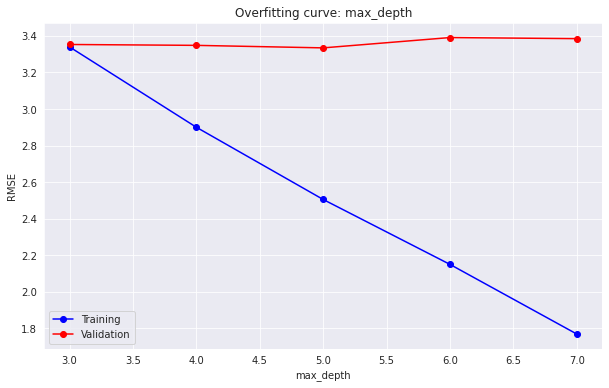

In [123]:
%%time
%matplotlib inline
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5, 6, 7], **best_params)

Using gpu for training xgboost is pretty fast. The time for training a single tree with 100 estimtors with cpu was 1.18 minutes but with gpu 5 model trained in just 42 seconds.

Looks like a max depth of 5 is ideal.

In [124]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 1min 3s, sys: 267 ms, total: 1min 4s
Wall time: 38.8 s


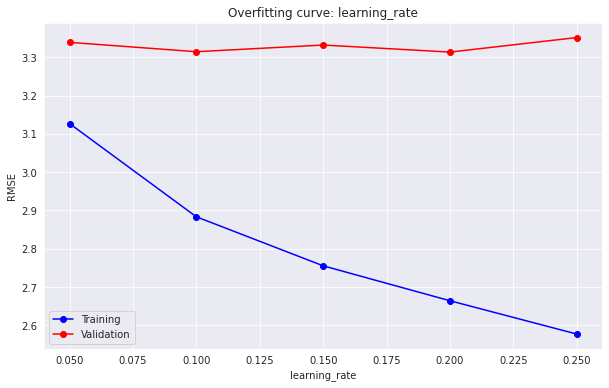

In [125]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.15, 0.2, 0.25], **best_params)

Seems like the best learning rate is 0.1.

In [126]:
best_params['learning_rate'] = 0.1

### Subsample

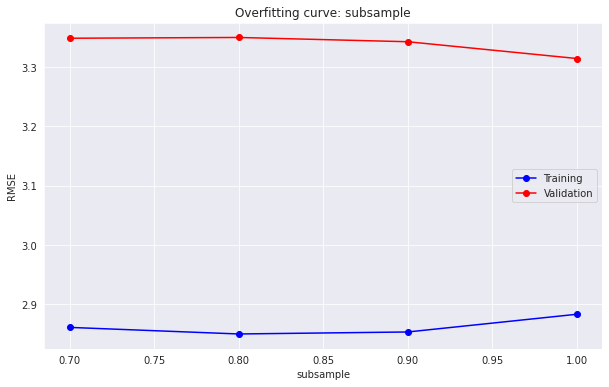

In [127]:
test_param_and_plot(XGBRegressor, 'subsample', [0.7, 0.8, 0.9,1], **best_params)

In [128]:
best_params['subsample'] = 1

### colsample_bytree

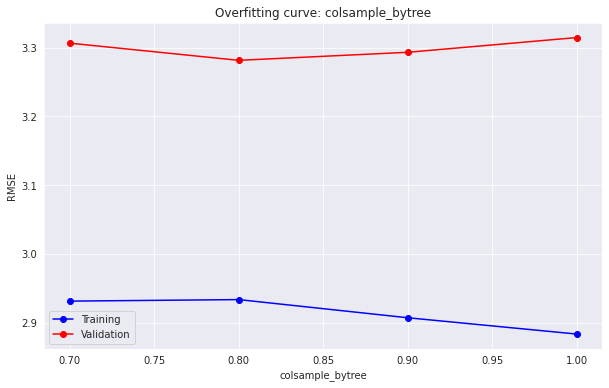

In [129]:
test_param_and_plot(XGBRegressor, 'colsample_bytree', [0.7, 0.8, 0.9,1], **best_params)

In [130]:
best_params['colsample_bytree'] = 0.8

### Other Parameters

Similarly we can experiment with other parameters. 

Here's a set of parameters that works well:

In [131]:
best_params

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'reg:squarederror',
 'tree_method': 'gpu_hist',
 'n_estimators': 750,
 'max_depth': 5,
 'learning_rate': 0.1,
 'subsample': 1,
 'colsample_bytree': 0.8}

In [132]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=750, max_depth=5, learning_rate=0.1, colsample_bytree=0.8,
                            tree_method= 'gpu_hist')

In [133]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 2.58 s, sys: 51.8 ms, total: 2.63 s
Wall time: 2.54 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=750, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [134]:
evaluate(xgb_model_final)

(2.9336038,
 3.281411,
 array([6.6079006, 5.5268946, 6.1397414, ..., 7.307519 , 6.7712903,
        7.220069 ], dtype=float32),
 array([ 5.213151 ,  6.645872 , 12.4997015, ...,  7.5581636,  8.839597 ,
         9.290504 ], dtype=float32))

This model is giving slightly better predictions than the base xgb model. Let's also plot the graph to see the importance of features in pridictions.

In [135]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgb_model_final.feature_importances_
}).sort_values('importance', ascending=False)

In [136]:
def plot_importance(importance_df):
    plt.figure(figsize=(10,6))
    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature')

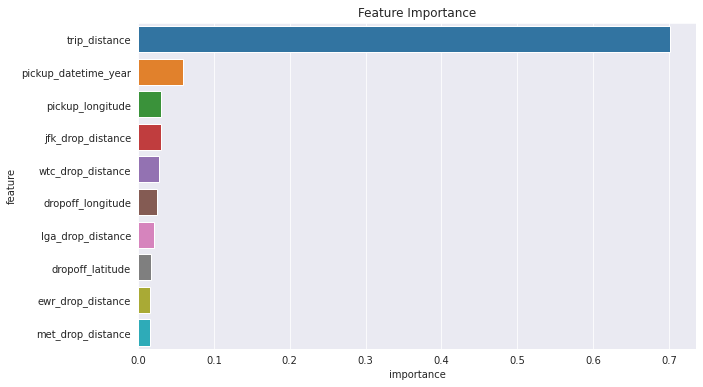

In [137]:
plot_importance(importance_df)

In [138]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.705520
1,2015-01-27 13:08:24.0000003,11.238443
2,2011-10-08 11:53:44.0000002,4.837996
3,2012-12-01 21:12:12.0000002,9.019483
4,2012-12-01 21:12:12.0000003,16.415047
...,...,...
9909,2015-05-10 12:37:51.0000002,8.788050
9910,2015-01-12 17:05:51.0000001,11.911766
9911,2015-04-19 20:44:15.0000001,52.455696
9912,2015-01-31 01:05:19.0000005,19.776159


### 2. Light GBM

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [139]:
import lightgbm as lgb

In [140]:
dtrain = lgb.Dataset(train_inputs, label = train_targets, silent=True, free_raw_data=False)
dval  = lgb.Dataset(val_inputs, label = val_targets, silent=True, free_raw_data=False)

In [141]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': -1,
        'metric': 'rmse',
    }

In [142]:
lgbm_base_model = lgb.train(params, train_set = dtrain, valid_sets = [dval])

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 8.72721
[2]	valid_0's rmse: 8.04945
[3]	valid_0's rmse: 7.45439
[4]	valid_0's rmse: 6.92732
[5]	valid_0's rmse: 6.45976
[6]	valid_0's rmse: 6.05245
[7]	valid_0's rmse: 5.6957
[8]	valid_0's rmse: 5.39024
[9]	valid_0's rmse: 5.12607
[10]	valid_0's rmse: 4.89859
[11]	valid_0's rmse: 4.70357
[12]	valid_0's rmse: 4.53753
[13]	valid_0's rmse: 4.39529
[14]	valid_0's rmse: 4.27548
[15]	valid_0's rmse: 4.17633
[16]	valid_0's rmse: 4.0872
[17]	valid_0's rmse: 4.00887
[18]	valid_0's rmse: 3.94614
[19]	valid_0's rmse: 3.89232
[20]	valid_0's rmse: 3.84448
[21]	valid_0's rmse: 3.80502
[22]	valid_0's rmse: 3.77024
[23]	valid_0's rmse: 3.74148
[24]	valid_0's rmse: 3.71479
[25]	valid_0's rmse: 3.69144
[26]	valid_0's rmse: 3.67179
[27]	valid_0's rmse: 3.65365
[28]	valid_0's rmse: 3.63918
[29]	valid_0's rmse: 3.62533
[30]	valid_0's rmse: 3.61426
[31]	valid_0's rmse: 3.60319
[32]	valid_0's rmse: 3.59351
[33]	valid_0's rmse: 3.58065
[34]	valid_0's rmse: 3.57084
[35]	valid_0's rmse: 3.56

In [143]:
evaluate(lgbm_base_model)

(3.508081703322025,
 3.372388762897907,
 array([6.93598966, 5.98264241, 6.00890699, ..., 7.06218149, 6.57809498,
        6.29307979]),
 array([ 5.78415573,  7.30901149, 13.56413241, ...,  7.73029075,
         9.1525465 ,  8.47022424]))

Tuning Hyperparameters for LGBM

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5

I'm using optuna for hyperparameter tuning. This is the first time i am using this in an kaggle competition.

In [144]:
import optuna

In [145]:
from optuna.integration import LightGBMPruningCallback


def objective(trial):
    
    param_grid = {
        "objective": trial.suggest_categorical("objective", ["regression"]),
        'metric': trial.suggest_categorical("metric", ['rmse']),
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt']),
        "verbose" :trial.suggest_categorical("verbose", [-1]),
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "num_boost_round": trial.suggest_categorical("num_boost_round", [1000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
    }

    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'rmse')


    model = lgb.train(param_grid , dtrain,
        valid_sets = [dval],
        early_stopping_rounds=100,
        callbacks=[pruning_callback]
    )
    
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)


    return val_rmse


In [146]:
study = optuna.create_study(direction="minimize", study_name="LGBM Regressor")
func = lambda trial: objective(trial)
study.optimize(func, n_trials=25)

[I 2021-12-24 17:36:42,711] A new study created in memory with name: LGBM Regressor
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-24 17:37:24,057] Trial 0 finished with value: 3.487536503467167 and parameters: {'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt', 'verbose': -1, 'device_type': 'gpu', 'num_boost_round': 1000, 'learning_rate': 0.08798437449657759, 'num_leaves': 480, 'max_depth': 8, 'min_data_in_leaf': 3100, 'lambda_l1'

In [147]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 3.28738
	Best params:
		objective: regression
		metric: rmse
		boosting_type: gbdt
		verbose: -1
		device_type: gpu
		num_boost_round: 1000
		learning_rate: 0.2520410979180426
		num_leaves: 1640
		max_depth: 9
		min_data_in_leaf: 300
		lambda_l1: 50
		lambda_l2: 40
		min_gain_to_split: 2.764844794754251
		bagging_fraction: 0.7
		bagging_freq: 1
		feature_fraction: 0.5


In [148]:
lgbm_final_model = lgb.train(study.best_params, train_set = dtrain, valid_sets = [dval], early_stopping_rounds=100)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 7.68055
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 6.37223
[3]	valid_0's rmse: 5.61799
[4]	valid_0's rmse: 4.97373
[5]	valid_0's rmse: 4.55357
[6]	valid_0's rmse: 4.24649
[7]	valid_0's rmse: 4.05051
[8]	valid_0's rmse: 3.92475
[9]	valid_0's rmse: 3.83268
[10]	valid_0's rmse: 3.79381
[11]	valid_0's rmse: 3.74402
[12]	valid_0's rmse: 3.70445
[13]	valid_0's rmse: 3.68019
[14]	valid_0's rmse: 3.65745
[15]	valid_0's rmse: 3.63915
[16]	valid_0's rmse: 3.63031
[17]	valid_0's rmse: 3.61908
[18]	valid_0's rmse: 3.60555
[19]	valid_0's rmse: 3.59754
[20]	valid_0's rmse: 3.58751
[21]	valid_0's rmse: 3.57933
[22]	valid_0's rmse: 3.57513
[23]	valid_0's rmse: 3.56651
[24]	valid_0's rmse: 3.56449
[25]	valid_0's rmse: 3.55291
[26]	valid_0's rmse: 3.54694
[27]	valid_0's rmse: 3.54168
[28]	valid_0's rmse: 3.5391
[29]	valid_0's rmse: 3.52966
[30]	valid_0's rmse: 3.5259
[31]	valid_0's rmse: 3.52218
[32]	valid_0's rmse: 3.5141
[33]	valid_0's rmse: 3

In [149]:
evaluate(lgbm_final_model)

(3.2246400678456513,
 3.2870586445147914,
 array([6.82382595, 5.40045231, 6.14568374, ..., 7.5622099 , 6.66086678,
        7.36374975]),
 array([ 4.74159499,  6.40978308, 12.34474499, ...,  7.617677  ,
         8.78851849,  9.83790308]))

In [150]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': lgbm_final_model.feature_importance()
}).sort_values('importance', ascending=False)

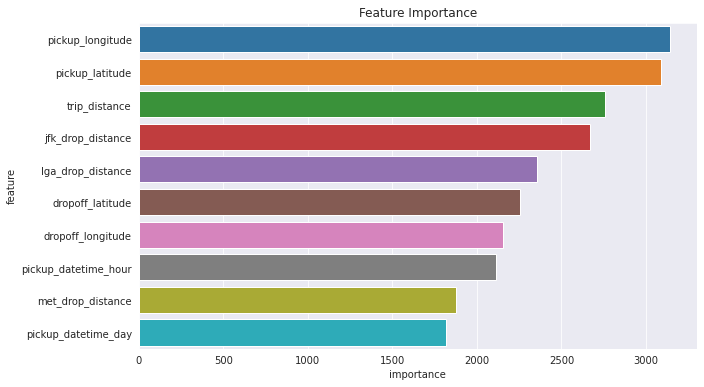

In [151]:
plot_importance(importance_df)

In [152]:
predict_and_submit(lgbm_final_model, 'lgbm_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.849373
1,2015-01-27 13:08:24.0000003,10.647316
2,2011-10-08 11:53:44.0000002,4.502847
3,2012-12-01 21:12:12.0000002,8.230312
4,2012-12-01 21:12:12.0000003,15.234121
...,...,...
9909,2015-05-10 12:37:51.0000002,8.986515
9910,2015-01-12 17:05:51.0000001,12.295787
9911,2015-04-19 20:44:15.0000001,50.690831
9912,2015-01-31 01:05:19.0000005,18.532991


## ANN

Finally, I'm training a neural network for this regression task. I will be using using a neural network of 4 hidden layers.

https://www.tensorflow.org/tutorials/keras/regression

https://keras.io/guides/sequential_model/

In [153]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [154]:
train_inputs.shape[1]

16

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scalin = scaler.fit_transform(train_inputs)
val_scalin = scaler.transform(val_inputs)
test_scalin = scaler.transform(test_inputs)

In [156]:
len(test_scalin)

9914

In [157]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [158]:
# define a deep neural network model
def build_and_compile_model(dim):
    model = keras.Sequential([

      layers.Dense(128, activation='relu', input_dim=dim),
      layers.BatchNormalization(),

      layers.Dense(64, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(32, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(8, activation='relu'),
      layers.BatchNormalization(),

      layers.Dense(1)
    ])

    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])
    return model


In [159]:
dnn_model = build_and_compile_model(dim=train_inputs.shape[1])
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2

2021-12-24 17:42:30.609856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 17:42:30.611179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 17:42:30.611833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 17:42:30.612643: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [160]:
ep_no = 50
Batch = 128

In [161]:
%%time
history = dnn_model.fit(
    train_scalin,
    train_targets,
    validation_data=(val_scalin, val_targets),
    validation_steps=len(val_scalin) // Batch,
    batch_size=    Batch,
    epochs=ep_no, verbose=1)

2021-12-24 17:42:35.793719: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3379/3379 [==============================] - 18s 5ms/step - loss: 4.9926 - mae: 3.3196 - val_loss: 3.5216 - val_mae: 1.8014
Epoch 2/50
3379/3379 [==============================] - 17s 5ms/step - loss: 3.6422 - mae: 1.9494 - val_loss: 3.3803 - val_mae: 1.7106
Epoch 3/50
3379/3379 [==============================] - 18s 5ms/step - loss: 3.5673 - mae: 1.9108 - val_loss: 3.3907 - val_mae: 1.7278
Epoch 4/50
3379/3379 [==============================] - 17s 5ms/step - loss: 3.5248 - mae: 1.8869 - val_loss: 3.2860 - val_mae: 1.6781
Epoch 5/50
3379/3379 [==============================] - 16s 5ms/step - loss: 3.4835 - mae: 1.8655 - val_loss: 3.5693 - val_mae: 1.7036
Epoch 6/50
3379/3379 [==============================] - 17s 5ms/step - loss: 3.4458 - mae: 1.8483 - val_loss: 3.3514 - val_mae: 1.6501
Epoch 7/50
3379/3379 [==============================] - 16s 5ms/step - loss: 3.4228 - mae: 1.8336 - val_loss: 3.2824 - val_mae: 1.7122
Epoch 8/50
3379/3379 [==============================] -

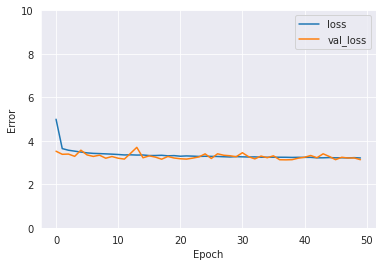

In [162]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [163]:
preds = dnn_model.predict(test_scalin, batch_size=Batch, verbose=1)

78/78 [==============================] - 0s 1ms/step


In [164]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
sub_df['fare_amount'] = preds
sub_df.to_csv('DNN_Submission.csv', index=None)

## 9. Train on GPU with entire dataset

Steps:
- Install `dask`, `cudf` and `cuml`
- Load the dataset to GPU
- Create training and validation set
- Perform feature engineering
- Train XGBoost `cuml` model
- Make predictions & submit